In [1]:
import os
import sys
current_directory = os.getcwd()
if not os.path.exists(current_directory + '\\experimental_data'):
    os.makedirs(current_directory + '\\experimental_data')
    os.makedirs(current_directory + '\\experimental_data\\plots')
    os.makedirs(current_directory + '\\experimental_data\\results')
sys.path.append(current_directory.replace('experiments', ''))
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')
from run import execute_simulation, create_experiment_snapshots, execute_ai_model
from mtdnetwork.mtd.completetopologyshuffle import CompleteTopologyShuffle
from mtdnetwork.mtd.ipshuffle import IPShuffle
from mtdnetwork.mtd.hosttopologyshuffle import HostTopologyShuffle
from mtdnetwork.mtd.portshuffle import PortShuffle
from mtdnetwork.mtd.osdiversity import OSDiversity
from mtdnetwork.mtd.servicediversity import ServiceDiversity
from mtdnetwork.mtd.usershuffle import UserShuffle
from mtdnetwork.mtd.osdiversityassignment import OSDiversityAssignment
import logging

logging.basicConfig(format='%(message)s', level=logging.INFO)

In [2]:
create_experiment_snapshots([25, 50, 75, 100])

In [3]:
features = ["host_compromise_ratio", "exposed_endpoints", "attack_path_exposure",  "overall_asr_avg", "roa", "shortest_path_variability", "risk"]
features = ['host_compromise_ratio']

In [4]:
# Learning Parameters
epsilon = 1.0  # exploration rate

# Simulator Settings
start_time = 0
finish_time = 3000
mtd_interval = 100
scheme = 'mtd_ai'
total_nodes = 300
new_network = True

In [5]:
evaluation = execute_ai_model(features = features, start_time=start_time, finish_time=finish_time, mtd_interval=mtd_interval, scheme=scheme, total_nodes=total_nodes, new_network=new_network)

Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
Static period: 0
Action: 4
MTD: ServiceDiversity triggered 0.0s
Static period: 30.0205504892365
Action: 4
MTD: ServiceDiversity triggered 100.1s
Static period: 29.96018048397565
Action: 2
MTD: ServiceDiversity triggered 200.2s
Static period: 29.438071180312818
Action: 4
MTD: ServiceDiversity triggered 300.6s
Static period: 29.94886557565627
Action: 2
MTD: IPShuffle triggered 400.9s
Static period: 100.4133871464332
Action: 4
MTD: IPShuffle triggered 501.3s
MTD: Interrupted EXPLOIT_VULN at 511.8s!
Static period: 89.58277037776202
Action: 2
MTD: IPShuffle triggered 601.4s
Static period: 100.514289832955
Action: 1
MTD: IPShuffle triggered 701.9s
MTD: Interrupted EXPLOIT_VULN at 711.4s!
Static period: 90.5721573625932
Action: 0
Static period: 90.5721573625932
Action: 2
MTD: IPShuffle triggered 802.0s
Static period: 100.26690969422191
Action: 

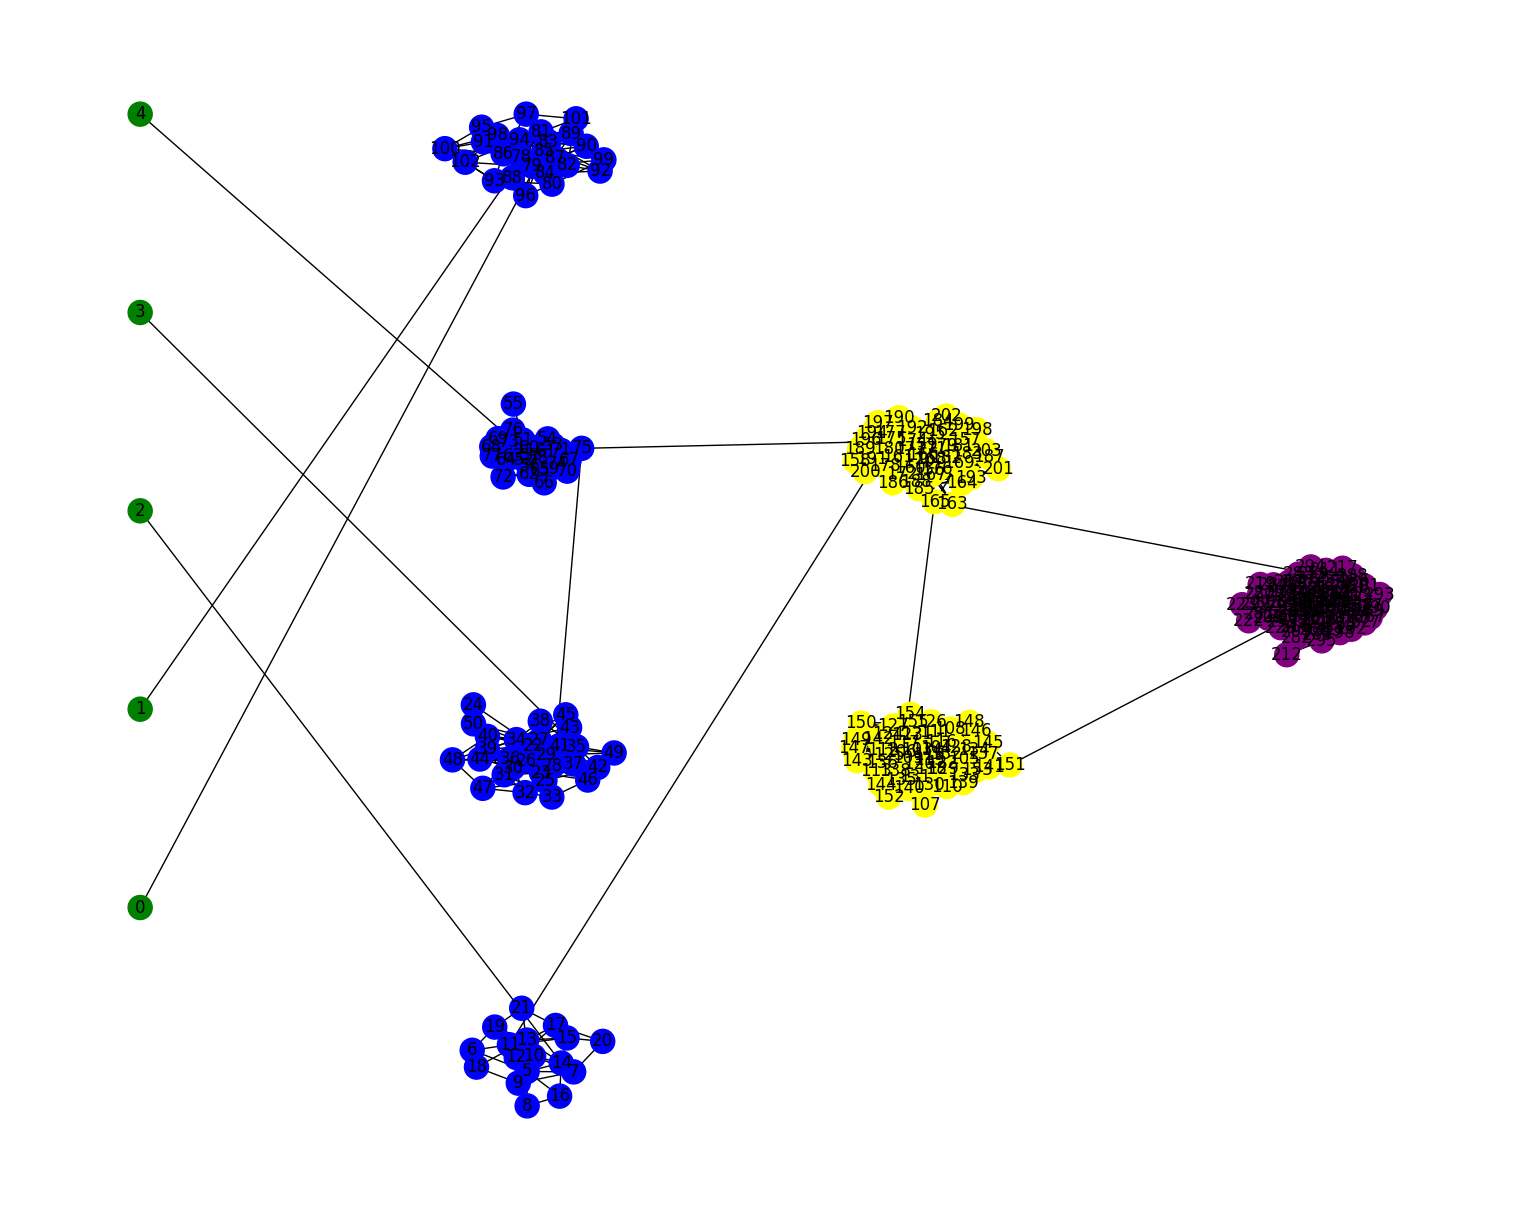

In [6]:
evaluation.get_network().draw()
plt.show()

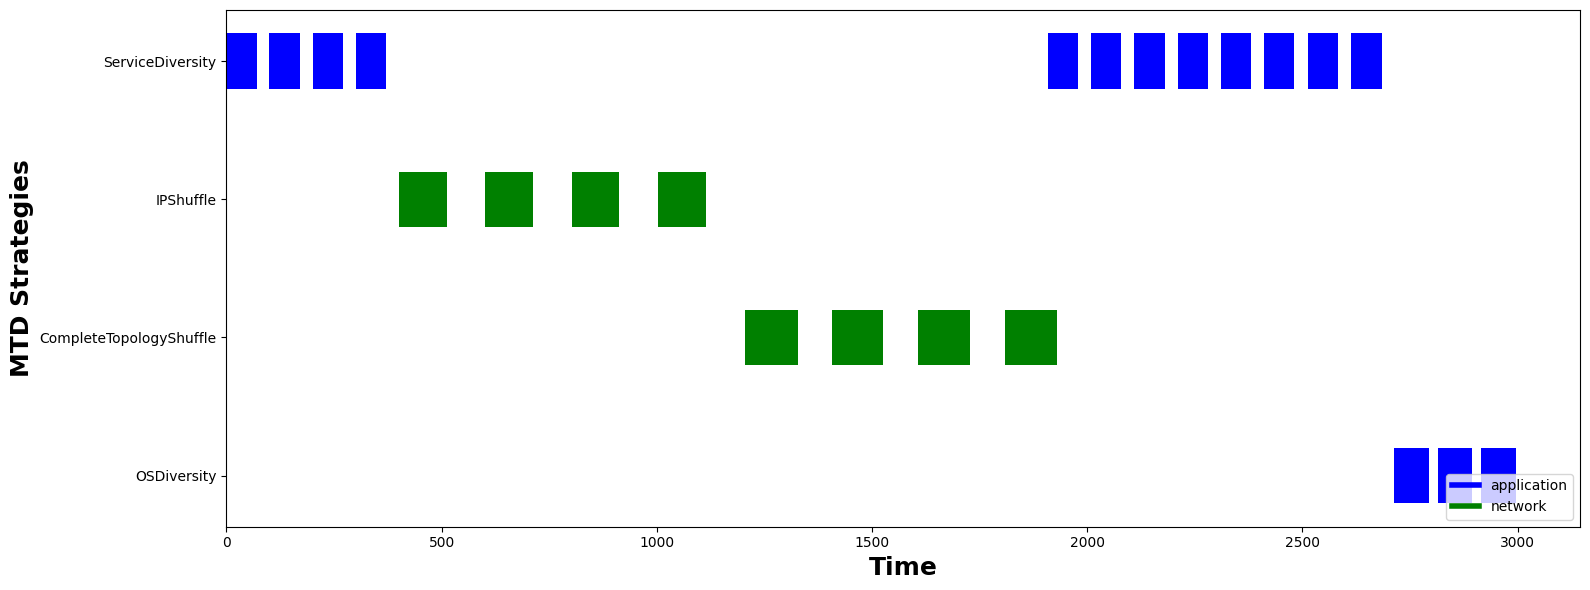

In [7]:
evaluation.visualise_mtd_operation()

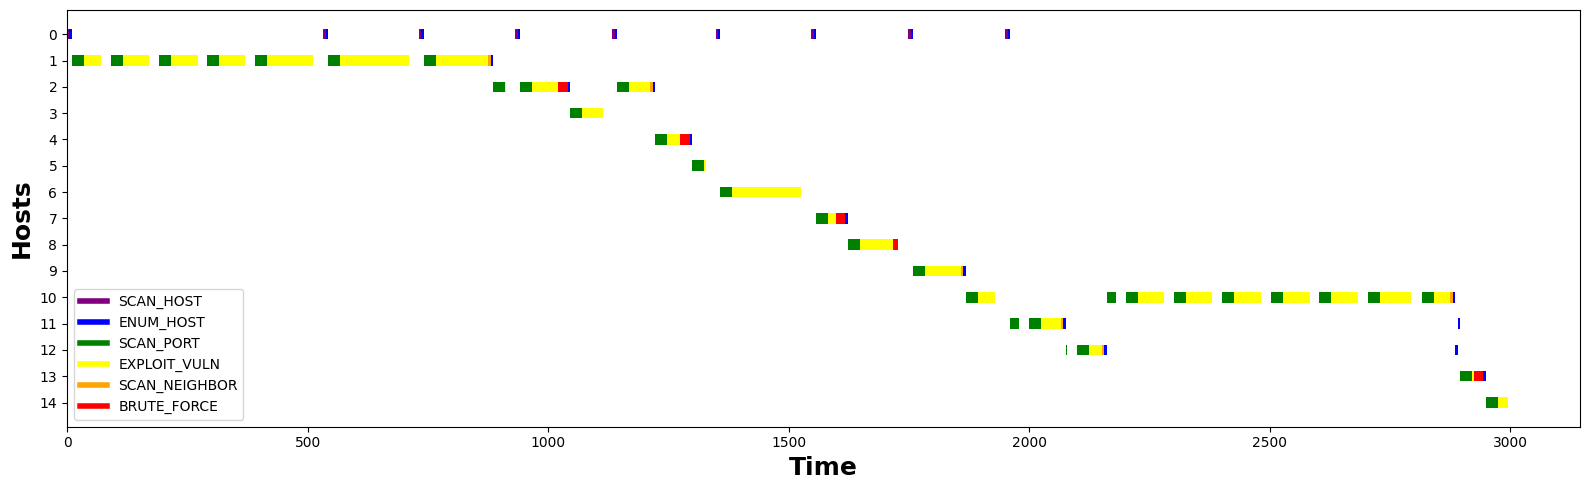

In [8]:
evaluation.visualise_attack_operation_group_by_host()

total compromised hosts:  6


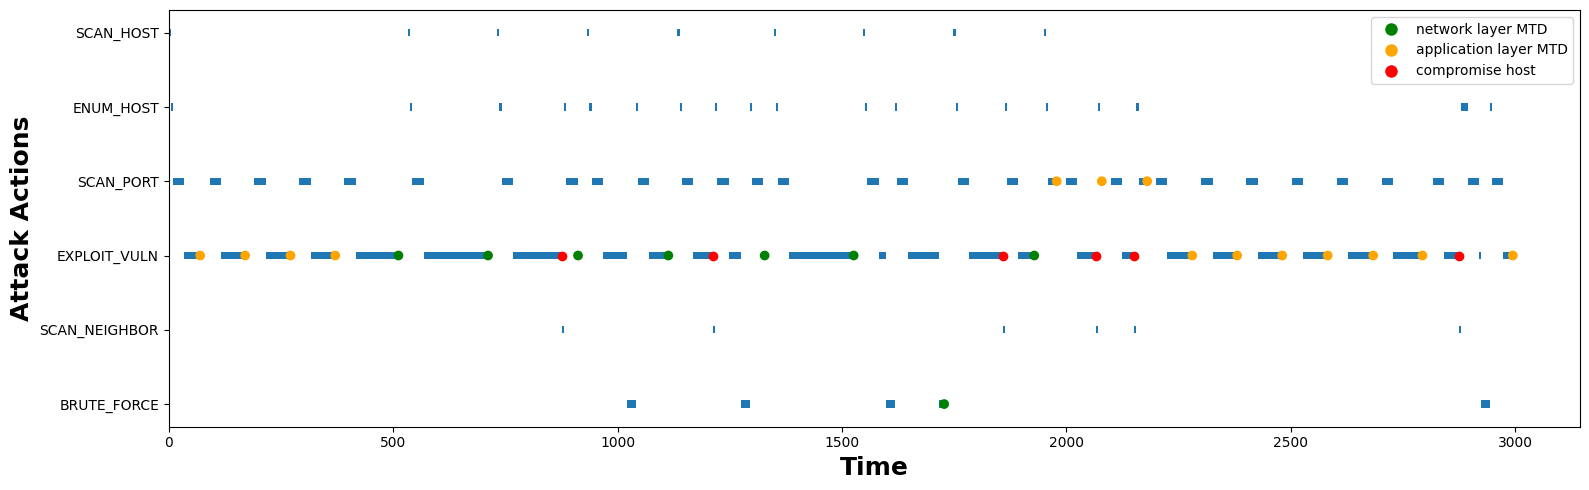

In [9]:
evaluation.visualise_attack_operation()

In [10]:
evaluation.compromise_record_by_attack_action()

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token
112,EXPLOIT_VULN,852.629844,876.035715,23.405871,0,148a831b-8b92-4d19-952a-f4e8f42a9840,0,148a831b-8b92-4d19-952a-f4e8f42a9840,3,93,0,"[Kippy, Corilla, Sibylle, Prudence, Clerissa]",None,None,yellow,1
141,EXPLOIT_VULN,1208.311851,1212.329747,4.017896,19,2aacb52f-0f05-4302-b6e7-b32b108b1d58,19,2aacb52f-0f05-4302-b6e7-b32b108b1d58,3,108,1,"[Jaime, Beryl, Becka, Annemarie, Danella]",None,None,yellow,2
208,EXPLOIT_VULN,1836.244337,1858.182480,21.938143,94,8e9c6e69-2a6a-4322-a526-66e59a2bcf77,94,8e9c6e69-2a6a-4322-a526-66e59a2bcf77,1,154,2,"[Barbi, Cathrine, Fidelia, Darsey, Corey]",None,None,yellow,9
226,EXPLOIT_VULN,2058.320920,2065.383798,7.062878,83,1831c9ab-2782-4ce9-8fc5-4398cd3427d6,83,1831c9ab-2782-4ce9-8fc5-4398cd3427d6,1,164,3,"[Minna, Brandais, Mia, Valenka]",None,None,yellow,11
236,EXPLOIT_VULN,2142.220631,2151.025974,8.805343,84,34be44a9-b02a-47b1-9927-753661db9af2,84,34be44a9-b02a-47b1-9927-753661db9af2,1,170,4,"[Karly, Eilis, Alanna, Cindie, April]",None,None,yellow,12
306,EXPLOIT_VULN,2869.741650,2875.502966,5.761316,88,4dc8b7ed-bcc0-40ed-beec-1b0ddcca5e00,88,4dc8b7ed-bcc0-40ed-beec-1b0ddcca5e00,2,224,5,"[Selene, Charmain, Kai, Sib]",None,None,yellow,10


In [11]:
evaluation.compromise_record_by_attack_action('SCAN_PORT')

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token


In [12]:
evaluation.compromise_record_by_attack_action('EXPLOIT_VULN')

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token
112,EXPLOIT_VULN,852.629844,876.035715,23.405871,0,148a831b-8b92-4d19-952a-f4e8f42a9840,0,148a831b-8b92-4d19-952a-f4e8f42a9840,3,93,0,"[Kippy, Corilla, Sibylle, Prudence, Clerissa]",None,None,yellow,1
141,EXPLOIT_VULN,1208.311851,1212.329747,4.017896,19,2aacb52f-0f05-4302-b6e7-b32b108b1d58,19,2aacb52f-0f05-4302-b6e7-b32b108b1d58,3,108,1,"[Jaime, Beryl, Becka, Annemarie, Danella]",None,None,yellow,2
208,EXPLOIT_VULN,1836.244337,1858.182480,21.938143,94,8e9c6e69-2a6a-4322-a526-66e59a2bcf77,94,8e9c6e69-2a6a-4322-a526-66e59a2bcf77,1,154,2,"[Barbi, Cathrine, Fidelia, Darsey, Corey]",None,None,yellow,9
226,EXPLOIT_VULN,2058.320920,2065.383798,7.062878,83,1831c9ab-2782-4ce9-8fc5-4398cd3427d6,83,1831c9ab-2782-4ce9-8fc5-4398cd3427d6,1,164,3,"[Minna, Brandais, Mia, Valenka]",None,None,yellow,11
236,EXPLOIT_VULN,2142.220631,2151.025974,8.805343,84,34be44a9-b02a-47b1-9927-753661db9af2,84,34be44a9-b02a-47b1-9927-753661db9af2,1,170,4,"[Karly, Eilis, Alanna, Cindie, April]",None,None,yellow,12
306,EXPLOIT_VULN,2869.741650,2875.502966,5.761316,88,4dc8b7ed-bcc0-40ed-beec-1b0ddcca5e00,88,4dc8b7ed-bcc0-40ed-beec-1b0ddcca5e00,2,224,5,"[Selene, Charmain, Kai, Sib]",None,None,yellow,10


In [13]:
evaluation.compromise_record_by_attack_action('BRUTE_FORCE')

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token


In [14]:
evaluation.evaluation_result_by_compromise_checkpoint()

[]